In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',400)

In [2]:
train = pd.read_parquet('../input/ubiquant-parquet/train_low_mem.parquet')
print(train.shape)

(3141410, 304)


In [3]:
train.head()

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,1.230508,0.114809,-2.012777,0.004936,0.284220,0.502155,-0.287932,-1.169338,-0.267310,-0.574423,-0.771869,1.012212,-1.230507,1.785726,-2.090686,0.325659,-0.877769,1.048786,0.131774,-0.349609,-1.813385,0.099226,-0.241020,1.604571,0.003637,-0.902062,0.221581,0.610063,-0.738558,2.097248,-0.913877,-0.293838,-0.037989,0.685313,0.000000,0.414692,-0.469456,-1.085879,-0.106443,0.059437,0.483066,1.189394,0.506955,0.754617,0.317529,-0.183254,5.163592,0.677065,-0.440767,0.631208,-1.845506,0.227782,0.841269,0.667432,-0.854111,-0.170443,-0.119705,-0.504936,0.662736,1.933138,-0.812392,0.072803,-0.778987,-0.553666,-0.032761,-0.619364,-1.424479,0.148335,0.257903,0.735336,0.563988,-0.272209,1.190193,-0.101368,1.334254,0.191304,0.631093,1.010617,0.161823,0.609280,-0.219488,-0.013066,1.506267,-1.319729,0.448331,-0.635492,-0.075377,1.033415,-0.663835,0.139904,0.186302,0.593067,-0.301417,0.666485,0.713296,1.020150,0.879753,-1.096843,-0.211008,-0.117488,-0.778925,0.065995,0.229715,0.435220,1.232932,-0.865958,0.062334,0.382317,-1.314973,0.786547,0.770604,-0.871134,0.583681,0.115572,0.209563,0.325480,0.469299,0.0,-0.731537,-0.249460,-0.050556,-1.232234,-0.790321,0.493377,0.357890,-0.381520,0.176383,0.747842,-0.741808,0.089653,1.080129,1.137773,1.199654,0.030609,-0.356244,0.247752,1.395867,0.961788,0.078155,-1.163461,0.707686,0.256030,-0.026309,0.329076,0.196018,0.653437,0.069232,0.907741,-0.350672,-1.170469,0.659417,0.937634,0.482803,-0.094882,0.317427,0.126840,0.892235,-1.198890,-0.315441,0.704042,-0.017697,-0.513040,-0.362513,1.000001,2.265769,0.360068,0.054464,1.640008,-1.000001,0.877145,0.368121,0.991219,-1.224520,-1.209457,-0.879788,1.000001,0.035147,0.693420,0.307024,0.143851,0.727827,1.220567,-0.939815,-0.106957,0.000000,-0.569376,0.187862,-0.386533,-0.452415,0.269767,-0.565408,-0.262123,-1.473739,0.0,0.428188,1.739962,0.941326,-0.729755,-0.533060,-0.983522,-0.043163,-0.225960,-0.008302,-0.448114,0.551247,-0.153030,-2.292569,0.186686,-0.443145,0.121193,0.787804,1.996148,-1.286072,-0.157245,1.019170,0.693566,0.797566,-0.192656,0.22274,0.921590,-0.171435,0.021656,1.152991,0.690099,3.251369,0.992130,-0.779892,-0.546556,-0.379102,1.896456,-0.732326,-0.113788,1.127601,-0.

In [4]:
test = pd.read_parquet('../input/ubiquant-parquet/example_test.parquet')
print(test.shape)
sub = pd.read_parquet('../input/ubiquant-parquet/example_sample_submission.parquet')

(9, 303)


In [5]:
def eda(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtype'])
    summary['miss'] = df.isnull().sum()
    #summary['nlevel'] = df.nunique()
    return summary

In [6]:
#train.duplicated().sum()

In [7]:
train[['row_id','time_id','investment_id']].nunique()

row_id           3141410
time_id             1211
investment_id       3579
dtype: int64

In [8]:
train.isnull().sum().sum()

0

In [9]:
eda(train)

,dtype,miss
row_id,object,0
time_id,uint16,0
investment_id,uint16,0
target,float32,0
f_0,float32,0
...,...,...
f_295,float32,0
f_296,float32,0
f_297,float32,0
f_298,float32,0


<AxesSubplot:>

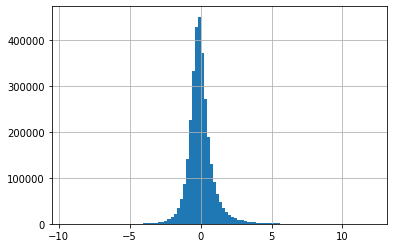

In [10]:
train.target.hist(bins = 100)

In [11]:
# all numeric features
train.sample(10000).nunique().sort_values()

time_id           1209
investment_id     3162
f_124             5220
f_182             5255
f_170             5255
                 ...  
f_221            10000
f_136            10000
f_146            10000
f_141            10000
row_id           10000
Length: 304, dtype: int64

<AxesSubplot:>

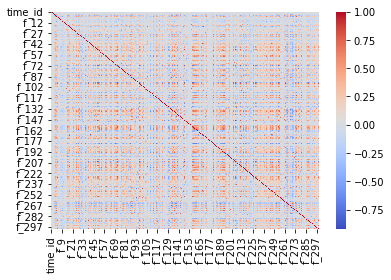

In [12]:
sns.heatmap(train.sample(10000).corr(), cmap = 'coolwarm')

In [13]:
train.sample(20000).corr()['target'].sort_values(ascending = False)

target    1.000000
f_145     0.065099
f_119     0.061175
f_225     0.061020
f_76      0.053132
            ...   
f_250    -0.063393
f_280    -0.064433
f_237    -0.066653
f_231    -0.069424
f_165    -0.074602
Name: target, Length: 303, dtype: float64

In [14]:
train.time_id.value_counts()

1214    3445
1209    3444
1211    3440
1207    3440
1208    3438
        ... 
415      659
362      651
374      600
398      539
492      512
Name: time_id, Length: 1211, dtype: int64

In [15]:
train.investment_id.value_counts()

2140    1211
2385    1209
1062    1209
1144    1209
2727    1209
        ... 
905        8
2558       8
3662       7
2800       3
1415       2
Name: investment_id, Length: 3579, dtype: int64

# sample record

In [16]:
tmp = train[train.investment_id == 1062]
tmp

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
652,0_1062,0,1062,-0.468671,-0.706653,-0.765238,0.620830,-0.581358,0.993605,0.408986,-1.014136,0.095467,0.114809,1.767237,0.568750,-1.500521,-0.299669,1.545938,0.893144,0.493121,-0.360222,-0.795652,-0.798325,-0.274717,1.514304,1.021932,0.325659,0.506284,-0.580076,-0.697355,0.584654,0.551460,-1.264652,0.369922,-0.772510,-0.567811,0.193658,0.227893,-0.478656,-1.019345,-1.102633,0.318607,-0.220715,0.150682,-1.734443,0.0,-0.625486,0.543677,-0.909959,0.735909,-1.375268,-0.167978,-0.840763,1.672215,1.207785,-1.546700,0.126111,0.082327,-1.326123,0.665396,0.631208,0.272635,-0.417051,-0.861674,1.052889,0.495243,-0.170443,-0.119705,0.416111,-0.160476,-0.550049,-0.300102,-0.912893,1.924908,-0.797469,-0.643473,-1.156277,1.175052,0.148335,0.876370,-1.889800,-0.820315,-0.024504,-1.129117,-0.725216,-1.061575,-0.032771,-0.009739,-0.324115,0.478538,-1.464586,0.992118,1.685829,-0.719781,0.458115,0.028216,-0.504775,0.611729,1.373285,-0.748614,-0.089654,0.679134,0.056345,-0.301417,-0.918706,1.192469,-0.980246,-0.988898,0.911709,0.083465,0.766609,-0.778925,0.065995,0.890967,-0.290496,0.280828,1.174991,-0.845299,0.735432,1.172035,-0.799616,-0.751252,-1.171431,-1.278963,-2.400776,-0.589889,-0.401835,0.625975,0.0,-0.799908,-1.238676,0.017041,0.987049,-0.067732,-1.697785,-0.878342,0.788408,-1.343340,-0.339070,0.169206,-0.731837,-0.727861,-0.878910,-0.954769,0.445254,1.340405,0.247752,-1.378464,-0.730910,0.078155,-0.707219,-1.002146,1.313210,-0.718942,0.329076,-0.437903,0.653437,0.069232,-0.490745,-0.783982,0.894645,1.651962,-0.957953,-1.301518,-1.009821,-1.484866,-0.469855,-0.635345,0.484227,0.071048,0.166579,0.656969,-0.513040,-0.699454,1.000001,-0.868112,-0.499799,1.464270,-0.709953,-1.000001,0.877145,-0.577665,-1.213652,-0.052410,1.050131,1.878611,1.000001,0.035142,-1.201712,-0.149064,1.101376,-0.208937,-0.969556,-0.836816,1.283493,-0.833030,1.416859,-0.675533,0.110969,1.064860,0.017915,1.025220,-1.041251,1.352322,0.000000,-0.496275,-0.156579,-0.198539,0.076939,-1.308248,-0.040962,0.815297,-0.096668,-0.543615,0.273005,1.222594,0.708510,0.804357,-1.199710,0.569348,0.492608,-0.781856,0.412967,0.777562,-0.273612,0.151109,-0.947877,0.597873,-0.139442,0.222740,1.255500,-1.737111,1.313390,-0.897759,-0.492390,-0.269776,-0.466078,0.060626,-0.434127,-0.364659,-0.4

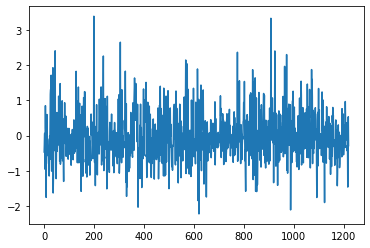

In [17]:
plt.plot(tmp.time_id, tmp.target)